In [43]:
import numpy as np #importing numpy for numerical variables
import pandas as pd  ##importing pandas for data manipulation (like reading the filem )
import matplotlib.pyplot as plt #for plots
import seaborn as sns #for stats based plots (advanced plots)

In [45]:
data = pd.read_csv(r'C:\Users\sajoshi\Downloads\Regression.csv')

In [46]:
data

,Age,Job Type,Marital Status,Education,Metro City,Signed in since(Days),Purchase made
0,28.0,Unemployed,No,Graduate,No,32,261.4689
1,57.0,Retired,Yes,Graduate,Yes,31,273.9025
2,27.0,Student,Yes,Graduate,Yes,31,275.8921
3,23.0,Unemployed,Yes,Secondry,Yes,34,295.1524
4,23.0,Employed,Yes,Graduate,Yes,42,325.0809
...,...,...,...,...,...,...,...
320,38.0,Employed,Yes,Graduate,Yes,100,15645.0064
321,44.0,Employed,Yes,Graduate,Yes,99,16184.9284
322,41.0,Employed,Yes,Graduate,Yes,98,16187.4729
323,41.0,Employed,Yes,Graduate,Yes,99,16993.7296


In [47]:
data.describe()

,Age,Signed in since(Days),Purchase made
count,312.000000,325.000000,325.00000
mean,38.349359,79.476923,7525.62652
std,8.267808,17.273676,3770.51836
min,23.000000,31.000000,261.46890
25%,32.000000,73.000000,5138.02240
50%,38.000000,84.000000,7624.78240
75%,44.000000,92.000000,9854.53290
max,65.000000,108.000000,17355.42760


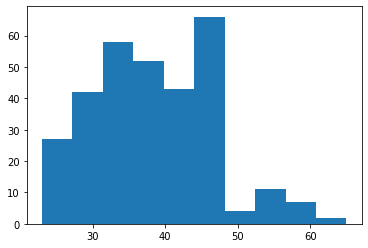

In [48]:
plt.hist(data["Age"]) #somewhat normally distributed
plt.show()

In [49]:
data.isnull().sum().sum() ##na is 13 values

13

In [50]:
data.isnull().values.any()

True

In [51]:
data["Age"].fillna(data["Age"].mean(),inplace=True) #since age follows normal distribution,replacing it with mean

In [52]:
data.isnull().sum().sum() #All na values have been replaced

0

In [53]:
data.describe() ##13 values have been replaced

,Age,Signed in since(Days),Purchase made
count,325.000000,325.000000,325.00000
mean,38.349359,79.476923,7525.62652
std,8.100244,17.273676,3770.51836
min,23.000000,31.000000,261.46890
25%,33.000000,73.000000,5138.02240
50%,38.000000,84.000000,7624.78240
75%,44.000000,92.000000,9854.53290
max,65.000000,108.000000,17355.42760


In [54]:
print(data.dtypes)  #finding catgeorical variables

Age                      float64
Job Type                  object
Marital Status            object
Education                 object
Metro City                object
Signed in since(Days)      int64
Purchase made            float64
dtype: object


In [67]:
df1=pd.get_dummies(data,columns=['Job Type','Marital Status','Education','Metro City']) ##via getdummies

In [162]:
df1.shape ##s325 rows,10 columns

(325, 10)

In [70]:
df1

,Age,Signed in since(Days),Purchase made,Job Type_Employed,Job Type_Retired,Job Type_Student,Job Type_Unemployed,Marital Status_No,Marital Status_Yes,Education_Graduate,Education_Primary,Education_Secondry,Metro City_No,Metro City_Yes
0,28.0,32,261.4689,0,0,0,1,1,0,1,0,0,1,0
1,57.0,31,273.9025,0,1,0,0,0,1,1,0,0,0,1
2,27.0,31,275.8921,0,0,1,0,0,1,1,0,0,0,1
3,23.0,34,295.1524,0,0,0,1,0,1,0,0,1,0,1
4,23.0,42,325.0809,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,38.0,100,15645.0064,1,0,0,0,0,1,1,0,0,0,1
321,44.0,99,16184.9284,1,0,0,0,0,1,1,0,0,0,1
322,41.0,98,16187.4729,1,0,0,0,0,1,1,0,0,0,1
323,41.0,99,16993.7296,1,0,0,0,0,1,1,0,0,0,1


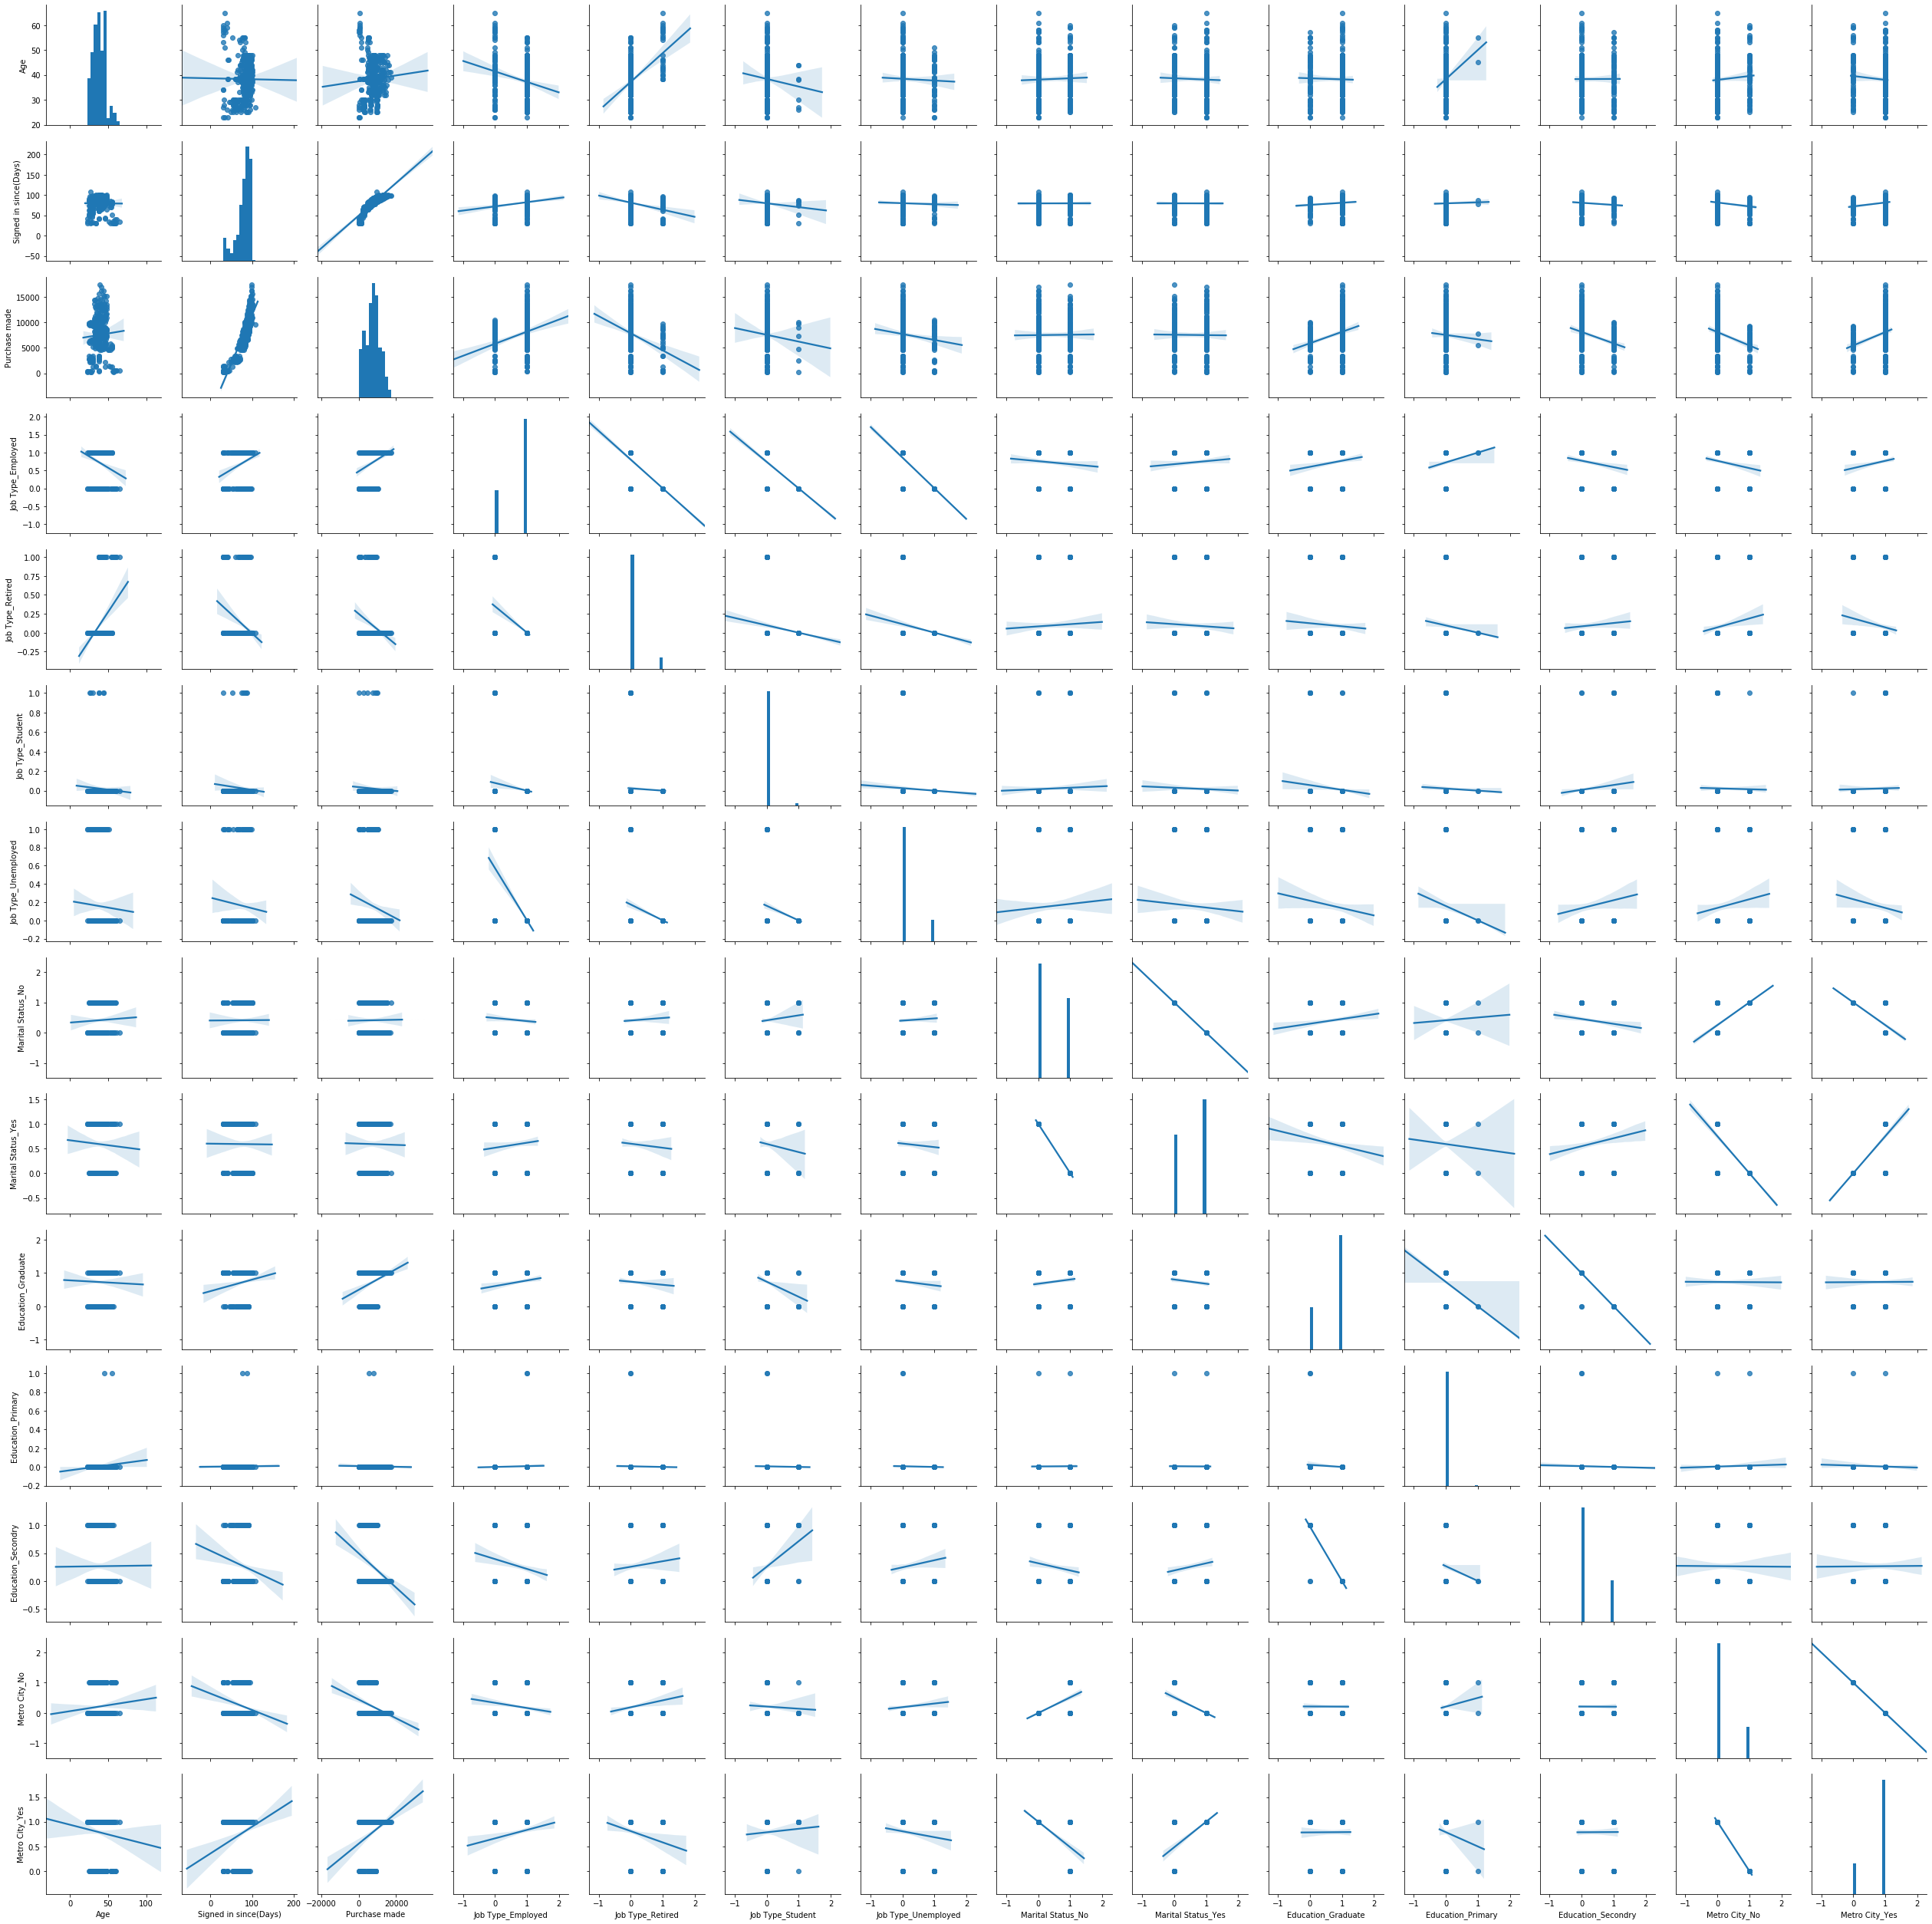

In [72]:
#Scatter plots
#Scatter plots can be used to check the relation of the variables 
sns.pairplot(df1,kind='reg') ##diagonals-Univariate rest all bivraiate(1X1,2x2,3x3 all diagonals)

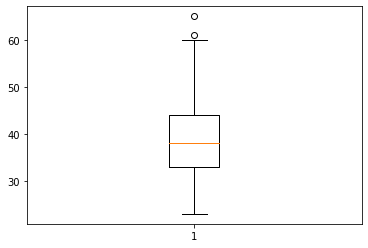

In [77]:
plt.boxplot(df1["Age"]) #detecting the outliers in Age
plt.show()

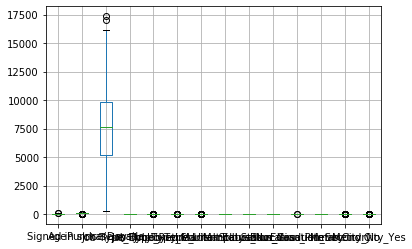

In [79]:
df1.plot.box(grid='True') ##purchasemade has outlier

In [81]:
from sklearn import preprocessing #sklearn has very good statistical & data analysis functions

In [82]:
xf=preprocessing.Normalizer() #just Normalizing the data

In [86]:
df2=pd.DataFrame(xf.fit_transform(df1))

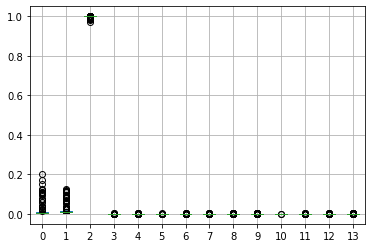

In [87]:
df2.plot.box(grid='True')

In [88]:
#Now we will peform linear Regression 

from sklearn.linear_model import LinearRegression

In [101]:
#Now we will split the data into dependent & indepedent dataframes
x=df1.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
y=df1.iloc[:,2]

In [112]:
lm=LinearRegression().fit(x,y)
print(lm.score(x,y))

##Linear reg model is able to predict the purchase pattern with 81% accuracy

0.8120195401298187


In [115]:
cor=df1.corr()

In [116]:
print(cor) ##Variables influencing purchase made are signed in Signed in since(Days) with
#Signed in since(Days) (.87),Job Type_Employed (.28),Metro City_Yes (.28),Job Type_Employed(0.281)

#Metro City_No (.285) has negative correlation with purchase made, 

                            Age  Signed in since(Days)  Purchase made  \
Age                    1.000000              -0.008115       0.054033   
Signed in since(Days) -0.008115               1.000000       0.877485   
Purchase made          0.054033               0.877485       1.000000   
Job Type_Employed     -0.232653               0.267024       0.281227   
Job Type_Retired       0.420360              -0.297464      -0.262287   
Job Type_Student      -0.055286              -0.080295      -0.051403   
Job Type_Unemployed   -0.032183              -0.055093      -0.112446   
Marital Status_No      0.032986               0.003835       0.009934   
Marital Status_Yes    -0.032986              -0.003835      -0.009934   
Education_Graduate    -0.023418               0.134084       0.263763   
Education_Primary      0.113353               0.011511      -0.017975   
Education_Secondry     0.003494              -0.137106      -0.262507   
Metro City_No          0.078092              -0.228

In [144]:
datapart2=pd.read_csv(r'C:\Users\sajoshi\Downloads\MyData.csv') #seeking answerspart2
datapart2

,Age,Signed in since(Days),Purchase made,Job Type_Employed,Job Type_Retired,Job Type_Unemployed,Marital Status_Yes,Education_secondary,Education_Graduate,Metro City_Yes
0,39,48,NaN,0,0,1,1,0,1,1
1,57,48,NaN,0,1,0,1,0,1,1
2,60,48,NaN,0,1,0,0,0,1,0
3,58,48,NaN,0,1,0,1,0,1,1
4,57,48,NaN,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
195,39,93,NaN,1,0,0,1,0,1,1
196,42,90,NaN,1,0,0,0,0,1,1
197,46,90,NaN,0,1,0,1,0,1,1
198,44,87,NaN,0,0,0,0,1,0,1


In [147]:
datapart2=datapart2.drop('Purchase made',1)

In [ ]:
lm2=LinearRegression()

In [152]:
x=df2.iloc[:,[0,1,3,4,5,6,7,8,9]]
y=df2.iloc[:,2]

In [154]:
lm2=LinearRegression().fit(x,y)


In [156]:
print(lm2.score(x,y))

0.8120195401298186


In [157]:
lm2.predict(datapart2) ###predicts values on new dataset for 200 observations on my_data dataset

array([  759.00665099,  1516.33960521,   923.05039284,  1557.42487349,
        1516.33960521,   881.96512455,  3771.76422684,  1064.40165405,
         835.04288847,  1063.45904184,   282.83894439,  2259.87529801,
         999.38396162,  1492.40718106,  2346.70583133,  3079.62952373,
        1902.70497154,  2495.9941839 ,  4988.06551257,  2083.98785868,
        4142.86584245,  1861.61970325,   661.04794278,  2599.83932942,
        1738.36389839,  5609.42769755,  3648.68898065,  4815.46341428,
        4837.57809033,  2976.09140882,  2276.48820559,  2753.72325339,
        3197.72411319,  2003.94404815,  5242.52246008,  4541.76561448,
        2896.0475983 ,  6189.79091539,  2715.50016222,  1367.44284145,
        2715.50016222,  3345.8588234 ,  3206.81484691,  3771.20933445,
        3771.71879954,  3096.27400643,  3359.71247431,  5719.54647774,
        2410.96147022,  5662.46587667,  8897.86186799,  7300.24680149,
        7079.58718082,  6652.52813502,  6785.26800537,  6502.04071279,
      

In [158]:
datapart2['Purchase made']=lm2.predict(datapart2)

In [159]:
datapart2.quantile(0.7)['Purchase made'] #determining quantile for 70% customers

7772.70864768289

In [160]:
df3=datapart2[datapart2['Purchase made']>7772.70864768289] #the csutomers with quantile valuae greater than quantile value for 70% customers

In [161]:
df3 ###top30% customers amongst 200

,Age,Signed in since(Days),Job Type_Employed,Job Type_Retired,Job Type_Unemployed,Marital Status_Yes,Education_secondary,Education_Graduate,Metro City_Yes,Purchase made
50,51,81,0,0,1,0,1,0,1,8897.861868
59,43,81,0,1,0,1,1,0,1,8024.936071
67,49,82,0,0,1,1,1,0,1,8432.070266
71,39,81,1,0,0,1,1,0,1,8288.600525
74,55,83,1,0,0,0,1,0,0,8586.261221
78,37,80,1,0,0,1,1,0,1,8028.009278
84,47,84,0,0,1,0,1,0,0,7990.196132
87,46,84,1,0,0,0,1,0,0,8394.914516
88,53,85,1,0,0,1,1,0,1,9577.477121
93,47,85,1,0,0,1,1,0,1,9330.965512
